Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [ ]:
sum = 0
sum_squared = 0

for i in range(1, 101):
  sum += i
  sum_squared += (i ** 2)

squared_sum = sum ** 2
difference = squared_sum - sum_squared
print(difference)

# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


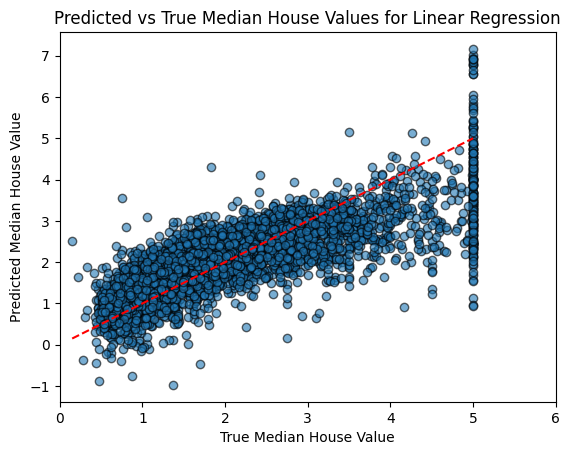

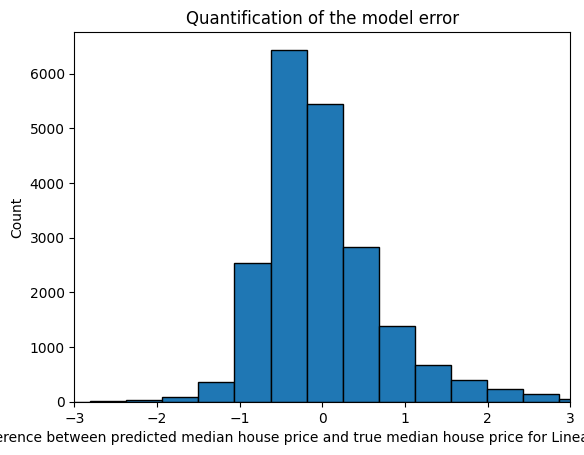


Feature Importance (Linear Regression Coefficients):
AveBedrms     0.593215
MedInc        0.433333
HouseAge      0.009293
Population   -0.000008
AveOccup     -0.004745
AveRooms     -0.098643
Latitude     -0.421449
Longitude    -0.434166
dtype: float64

Linear Regression r^2:  0.5943232652466202
Linear Regression RMSE:  0.7273129773603114
Linear Regression MAE:  0.535126133655451

MLP Regression r^2: 0.39441264252395847
MLP Regression RMSE: 0.8886273704769257
MLP Regression MAE: 0.6741928867540095


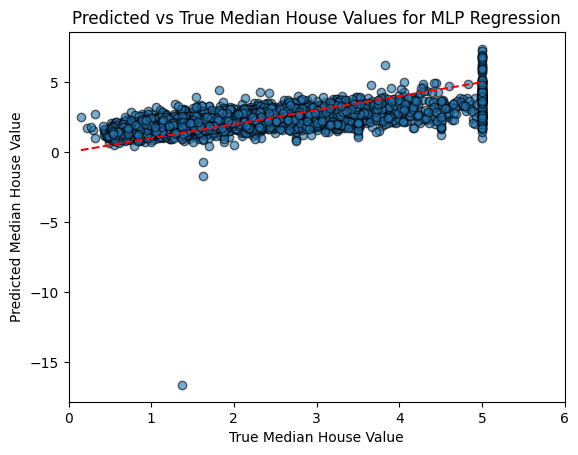

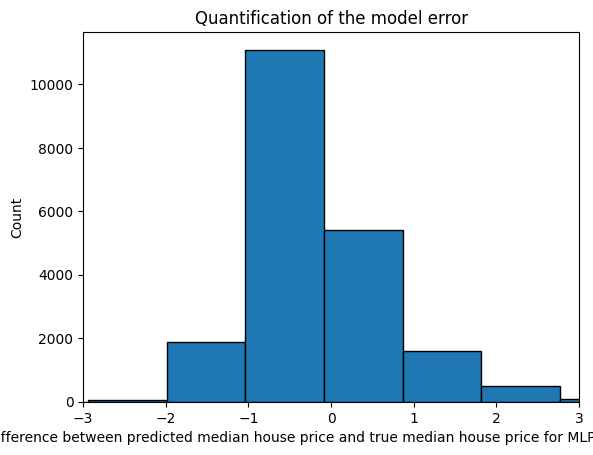


Tree Regression r^2: 0.5890766674660357
Tree Regression RMSE: 0.7320010204454555
Tree Regression MAE: 0.4671585804263566


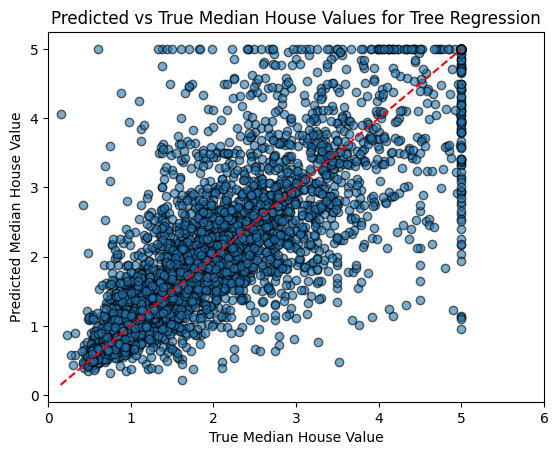

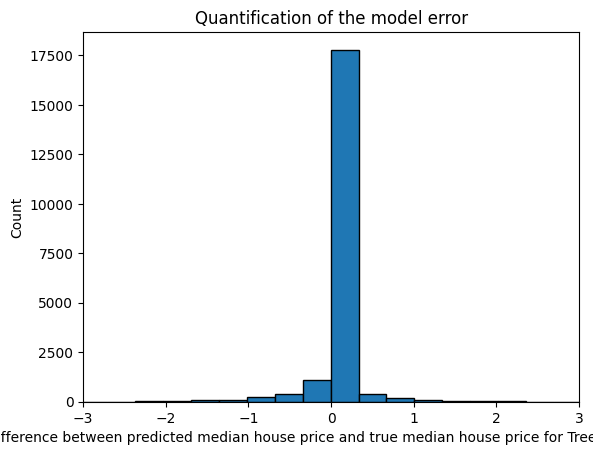


KNN Regression r^2: 0.14312051440566032
KNN Regression RMSE: 1.0570393587438944
KNN Regression MAE: 0.8141586656976745


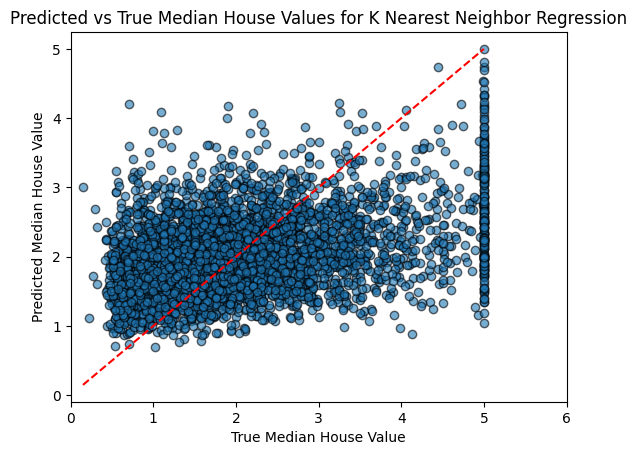

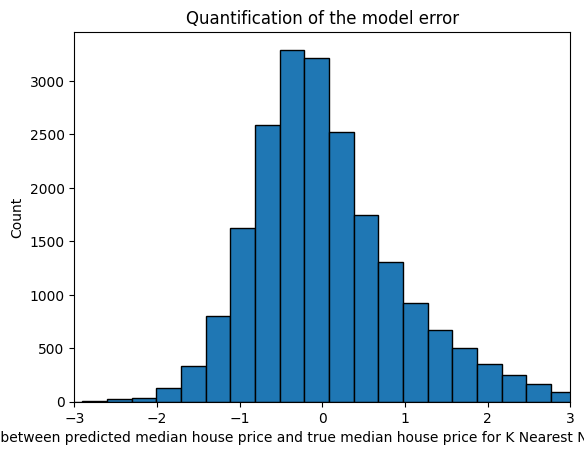

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

plt.scatter(y_test, y_pred, alpha = 0.6, edgecolors = "k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         "r--")
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs True Median House Values for Linear Regression")
plt.xlim(0, 6)
plt.show()

y_pred_all = model.predict(X)
residuals = y - y_pred_all
plt.hist(residuals, bins = 25, edgecolor = "k")
plt.xlim(-3, 3)
plt.xlabel("Difference between predicted median house price and true median house price for Linear Regression")
plt.ylabel("Count")
plt.title("Quantification of the model error")
plt.show()

importance = pd.Series(model.coef_, index=feature_names)
print("\nFeature Importance (Linear Regression Coefficients):")
print(importance.sort_values(ascending=False))
print("\nLinear Regression r^2: ", r2_score(y_test, y_pred))
print("Linear Regression RMSE: ", rmse)
print("Linear Regression MAE: ", mean_absolute_error(y_test, y_pred))

mlp_reg = MLPRegressor(max_iter=20000, tol=0.1)
mlp_reg.fit(X_train, y_train)
mlp_y_pred = mlp_reg.predict(X_test)

print("\nMLP Regression r^2:", r2_score(y_test, mlp_y_pred))
print("MLP Regression RMSE:", np.sqrt(mean_squared_error(y_test, mlp_y_pred)))
print("MLP Regression MAE:", mean_absolute_error(y_test, mlp_y_pred))

plt.scatter(y_test, mlp_y_pred, alpha = 0.6, edgecolors = "k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         "r--")
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs True Median House Values for MLP Regression")
plt.xlim(0, 6)
plt.show()

y_pred_all_MLP = mlp_reg.predict(X)
MLP_residuals = y - y_pred_all_MLP
plt.hist(MLP_residuals, bins = 25, edgecolor = "k")
plt.xlim(-3, 3)
plt.xlabel("Difference between predicted median house price and true median house price for MLP Regression")
plt.ylabel("Count")
plt.title("Quantification of the model error")
plt.show()

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_y_pred = tree_reg.predict(X_test)

print("\nTree Regression r^2:", r2_score(y_test, tree_y_pred))
print("Tree Regression RMSE:", np.sqrt(mean_squared_error(y_test, tree_y_pred)))
print("Tree Regression MAE:", mean_absolute_error(y_test, tree_y_pred))

plt.scatter(y_test, tree_y_pred, alpha = 0.6, edgecolors = "k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         "r--")
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs True Median House Values for Tree Regression")
plt.xlim(0, 6)
plt.show()

y_pred_all_tree = tree_reg.predict(X)
tree_residuals = y - y_pred_all_tree
plt.hist(tree_residuals, bins = 25, edgecolor = "k")
plt.xlim(-3, 3)
plt.xlabel("Difference between predicted median house price and true median house price for Tree Regression")
plt.ylabel("Count")
plt.title("Quantification of the model error")
plt.show()

knn_reg = KNeighborsRegressor(n_neighbors = 5)
knn_reg.fit(X_train, y_train)
knn_y_pred = knn_reg.predict(X_test)

print("\nKNN Regression r^2:", r2_score(y_test, knn_y_pred))
print("KNN Regression RMSE:", np.sqrt(mean_squared_error(y_test, knn_y_pred)))
print("KNN Regression MAE:", mean_absolute_error(y_test, knn_y_pred))

plt.scatter(y_test, knn_y_pred, alpha = 0.6, edgecolors = "k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         "r--")
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs True Median House Values for K Nearest Neighbor Regression")
plt.xlim(0, 6)
plt.show()

y_pred_all_knn = knn_reg.predict(X)
knn_residuals = y - y_pred_all_knn
plt.hist(knn_residuals, bins = 25, edgecolor = "k")
plt.xlim(-3, 3)
plt.xlabel("Difference between predicted median house price and true median house price for K Nearest Neighbor Regression")
plt.ylabel("Count")
plt.title("Quantification of the model error")
plt.show()

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [ ]:
# your code here